In [1]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import timeit
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

sns.set_context("notebook")
sns.set_style("whitegrid")

TOL = 1e-6
MAX_ITER = 1e4

In [2]:
# <!-- collapse=True -->

# <end collapse>

Formally, we can express this for some real-valued function $f$ as the value(s) $x^\ast\in \mathcal{X^\ast}$ such that $\forall x^\ast\in\mathcal{X}^\ast\subseteq\mathcal{X},f(x^\ast)=0$, where $\mathcal{X}$ is the function domain. The inputs that satisfy this condition are called the *roots* (or *zeros*) of $f$, and while finding the roots of an equation can, in some cases, be trivial (e.g. in the case of the linear equation $f(x)=mx+c=0$, $x^\ast=-\frac{c}{m}$), functions of interest tend to be nonlinear in practice, meaning there is no "cookbook" recipe to solve for $\mathcal{X}^\ast$.

The lack of a closed-form solution means we must turn to numerical approximation methods — called *root-finding algorithms* — to find values *tolerably close* to a function's real roots via iterative refinement. In this post, I'll briefly explore four well-known root-finding algorithms and showcase their graphical interpretations, before briefly comparing the methods.

To demonstrate each algorithm, we will use the function $f(x)=\sin (x) - 2x^3 + 3x^2 + x + 1$, a nonlinear function with $x^\ast\approx 1.992$ that looks like the following:

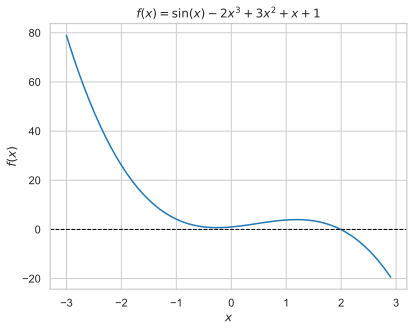

In [3]:
func = lambda x : np.sin(x) - 2*(x**3) + 3*(x**2) + x + 1
func_prime = lambda x : np.cos(x) - 6*(x**2) + 6*x + 1

x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.title(r'$f(x)=\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.axhline(0, lw=1, linestyle='dashed', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

## Methods

### Bisection method

The bisection method can be thought of as a graphical analog to [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm) — the general process is to define a lower and upper bound between which we believe $x^\ast$ lies, and iteratively halve our search space while evaluating our function and checking for over/under-shooting to adjust the lower/upper bound as necessary.

The algorithm for the bisection method is therefore:

> 1. Begin with two guesses $a,b$ such that we believe $x^\ast\in(a,b)$
> 2. Calculate $x_{\text{mid}}=\frac{a+b}{2}$ as the midpoint between $a$ and $b$
> 3. If $f(x_{\text{mid}})<0$, then we know we are too far to the left of $x^\ast$, so update the lower bound $a\gets x_{\text{mid}}$
> 4. If $f(x_{\text{mid}})>0$, then we know we are too far to the right of $x^\ast$, so update the upper bound $b\gets x_{\text{mid}}$
> 5. Repeat steps 2–4 until we either exceed the maximum number of iterations, or changes in $x_{\text{mid}}$ are vanishingly small (convergence)
> 6. Return $x_{\text{mid}}$

In Python, we can write this as:

In [4]:
def bisection(f_func, interval, tol=1e-9, max_iter=1e4, verbose=False, steps=False):
    a, b = interval
    counter = 0
    assert f_func(a) != f_func(b), "Function evaluates to same value at (a) and (b)"
    
    max_iter = int(max_iter)
    steps_arr = []
    
    for i in range(max_iter):
        mid_point = (a+b)/2
        if verbose: print(mid_point)
        if abs(b-a) < tol or abs(f_func(mid_point)) < tol:
            if steps:
                return mid_point, steps_arr
            return mid_point # if reached below tolerance

        if steps: steps_arr += [mid_point]
        
        # reassigning interval start/end
        if np.sign(f_func(mid_point)) == np.sign(f_func(a)):
            a = mid_point
        else:
            b = mid_point
        
        counter += 1
    
    raise ValueError("No convergence")

And an initialization of the bisection method with the lower and upper bounds $a=1.5,b=2.5$ looks like:

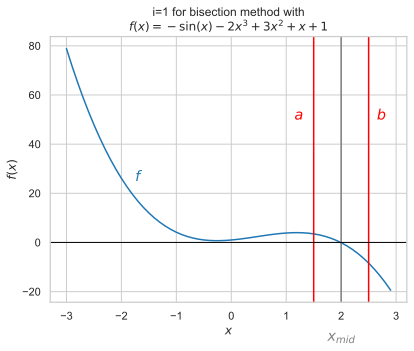

In [5]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.axvline(1.5, c='red')
plt.text(1.15,50,r'$a$',color='red',fontsize='large')

plt.axvline(2.5, c='red')
plt.text(2.65,50,r'$b$',color='red',fontsize='large')

plt.axvline((1.5+2.5)/2, c='grey')
plt.text(1.75,-40,r'$x_{mid}$',color='grey',fontsize='large')

plt.axhline(0, color='black', linewidth=1)

plt.title(r'i=1'+f' for bisection method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

To refine our guess for the second iteration, we calculate $x_{\text{mid}}=\frac{1.5+2.5}{2}=2.0$, and we find that $f(2.0)<0$, so we update $b\gets 2.0$ (denoted below as $b^\prime$).

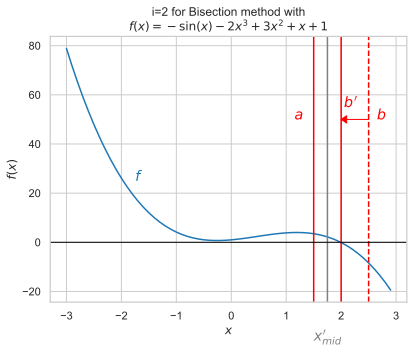

In [6]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.axvline(1.5, c='red')
plt.text(1.15,50,r'$a$',color='red',fontsize='large')

plt.axvline(2.5, c='red', linestyle='dashed')
plt.text(2.65,50,r'$b$',color='red',fontsize='large')
plt.arrow(2.5,50,-.5,0,color='red', length_includes_head=True, head_width=3, head_length=.1)
plt.axvline(2, c='red')
plt.text(2.05,55,r'$b^\prime$',color='red',fontsize='large')

plt.axvline(1.75,c='grey')
plt.text(1.5,-40,r'$x_{mid}^\prime$',color='grey',fontsize='large')

plt.axhline(0, color='black', linewidth=1)

plt.title(r'i=2'+f' for Bisection method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

When evaluated, we can see the algorithm attains an approximation for $x^\ast$ in 30 steps:

In [7]:
bisection(func, (1.5, 2.5), verbose=True)

2.0
1.75
1.875
1.9375
1.96875
1.984375
1.9921875
1.98828125
1.990234375
1.9912109375
1.99169921875
1.991943359375
1.9920654296875
1.99200439453125
1.991973876953125
1.9919891357421875
1.9919967651367188
1.9920005798339844
1.9920024871826172
1.9920015335083008
1.992002010345459
1.9920017719268799
1.9920018911361694
1.9920019507408142
1.9920019805431366
1.9920019954442978
1.9920020028948784
1.992001999169588
1.992001997306943
1.9920019963756204
1.9920019968412817


1.9920019968412817

### Newton's method

Newton's method works by approximating the target function as a straight line at each iterative guess $x_i$, and uses the root of the straight line approximation as the next iterative guess $x_{i+1}$.

A correct observation is that in order to do this, we need to be able to calculate the slope of the function at any point, i.e., we need the first derivative $f'(x)$ of the target function. By linearly approximating the function at each guess, the idea is that the $x$-intercept (root) of each line at $x_i$ will approach $x^\ast$ as iterations progress, since each slope will more accurately "point" to where the true $x$-intercept lies.

We can derive Newton's method by starting with the graphical intuition: with the same target function as above, if we choose $x_0=2.75$ and draw the slope of $f$ at this point, the motivation for Newton's method becomes slightly more clear:

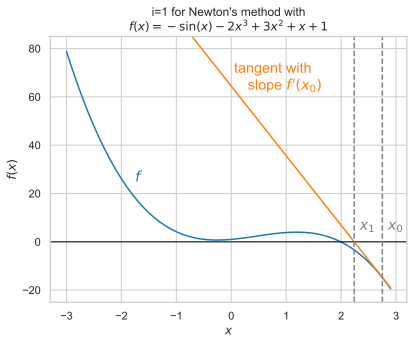

In [8]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

#y=mx+c
xz = 2.75
xp = func_prime(xz)*x_vals - xz*func_prime(xz) + func(xz)
xpf = lambda x : func_prime(xz)*x - xz*func_prime(xz) + func(xz)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(.05,xpf(.05)+7,r'tangent with',fontsize='large', color='tab:orange')
plt.text(.3,xpf(.05), r'slope $f^\prime(x_0)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1,5,r'$x_0$',fontsize='large',color='grey')

x1=(xz*func_prime(xz)-func(xz))/func_prime(xz)
plt.axvline(x1,color='grey',linestyle='dashed')
plt.text(x1+.1,5,r'$x_1$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Newton\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

Examining the right-angle triangle formed by $(x_0,f(x_0))$, $(x_0,0)$, and $(x_1,0)$ we can perform some trigonometry to analytically solve for $x_1$:

If we denote $x^\star_0=(x_0,0),x^\star_1=(x_1,0),x^\star_f=(x_0,f(x_0))$, then consider $\angle x^\star_0x^\star_1x^\star_f$, the angle between the tangent line and $x=0$. If we note that the tangent of this angle is equivalent to the slope of the target function at $x_0$, we can analytically obtain $x_1$:

$$\begin{align*}
\tan(\angle x^\star_0x^\star_1x^\star_f)&=\frac{f(x_0)}{x_0-x_1}=f'(x_0)\space\text{by definition} \\
\therefore x_1 &= x_0-\frac{f(x_0)}{f'(x_0)}
\end{align*}$$

which can be generalized to:

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

So we derive Newton's method as just:

> 1. Obtain the derivative of our function $f'(x)$ and choose an initial guess $x_0$
> 2. Update $x_{i+1}\gets x_i-\frac{f(x_i)}{f'(x_i)}$
> 3. Repeat step 2 until maximum iterations reached or convergence

We can write this in Python as (assuming we have the first derivative):

In [9]:
def newton(a_func_arr, x_0, tol=1e-9, max_iter=1e4, verbose=False, steps=False):
    a_func, a_func_d = a_func_arr
    max_iter = int(max_iter)
    x_prev = x_0
    counter = 0
    steps_arr = []
    
    for i in range(max_iter):
        if verbose: print(x_prev)
        f_last = a_func(x_prev)
        assert a_func_d(x_prev) != 0, "Derivative evaluates to zero"
        fp_last = a_func_d(x_prev) # getting f(x) and f'(x)
        x_cur = x_prev - (f_last/fp_last)

        if steps: steps_arr += [x_cur]
        
        # checking tolerance
        if abs(x_cur - x_prev) < tol or abs(f_last) < tol:
            if steps:
                return (x_cur, steps_arr)
            return x_cur
        
        x_prev = x_cur # reassigning previous x_i
        counter += 1
    
    raise ValueError("No convergence")

And in the above example, the second iteration for the above example is the following:

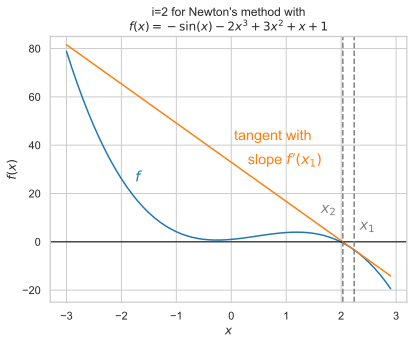

In [10]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

#y=mx+c
xz = x1
xp = func_prime(xz)*x_vals - xz*func_prime(xz) + func(xz)
xpf = lambda x : func_prime(xz)*x - xz*func_prime(xz) + func(xz)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(.05,xpf(.05)+10,r'tangent with',fontsize='large', color='tab:orange')
plt.text(.3,xpf(.05), r'slope $f^\prime(x_1)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1,5,r'$x_1$',fontsize='large',color='grey')

x1=(xz*func_prime(xz)-func(xz))/func_prime(xz)
plt.axvline(x1,color='grey',linestyle='dashed')
plt.text(x1-.4,12,r'$x_2$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=2'+f' for Newton\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

Where we can observe that $x_2$ is clearly closer to $x^\ast$ than $x_1$ or $x_0$.

With an initial guess of $2.75$, Newton's method exploits the curvature of the function closer to its root and approximates $x^\ast$ in just five iterations:

In [11]:
newton((func, func_prime), 2.75, verbose=True)

2.75
2.2369810103834453
2.030289413632833
1.9931699355600199
1.9920031341898878
1.9920019966385754


1.9920019966374949

### Secant method

A _secant_ in geometry is a line that intersects a curve at two or more points — the secant method iteratively constructs these lines that intersect the target function by beginning with two guesses, $x_0$ and $x_1$. Then, the root of this secant $x_2$ is used to construct the next secant, and so on until convergence.

Again, it's easier to visualize the strategy to derive the equation form:

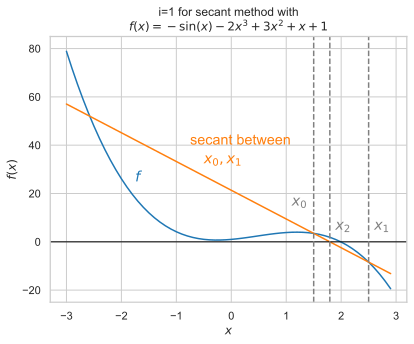

In [12]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

#y=mx+c
xz0, xz1 = 1.5, 2.5
xp = (func(xz1) - func(xz0))/(xz1-xz0) * (x_vals - xz1) + func(xz1)
xpf = lambda x : (func(xz1) - func(xz0))/(xz1-xz0) * (x - xz1) + func(xz1)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
linex = -.75
plt.text(linex,xpf(linex)+10,r"secant between",fontsize='large', color='tab:orange')
plt.text(linex+.25,32.5, r'$x_0, x_1$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz0, color='grey', linestyle='dashed')
plt.text(xz0-.4,15,r'$x_0$',fontsize='large',color='grey')

plt.axvline(xz1, color='grey', linestyle='dashed')
plt.text(xz1+.1,5,r'$x_1$',fontsize='large',color='grey')

xzn = xz1 - func(xz1)*((xz1-xz0)/(func(xz1)-func(xz0)))
plt.axvline(xzn,color='grey',linestyle='dashed')
plt.text(xzn+.1,5,r'$x_2$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for secant method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

With $x_0$ and $x_1$, we can construct the secant line $g(x)$ intersecting the two points $(x_0, f(x_0)), (x_1, f(x_1))$ using a linear equation. The gradient of this line is simply $\frac{f(x_1)-f(x_0)}{x_1-x_0}$, and the line is horizontally shifted by $x_0$ and vertically by $f(x_0)$ since we know it passes through the point $(x_0, f(x_0))$. Ultimately, we have:

$$\begin{align*}
g(x)=\frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0) + f(x_0)
\end{align*}$$

and the root of this secant line is when $g(x)=0$, which we can rearrange with some algebra to derive an expression for $x$:

$$\begin{align*}
g(x)=0&=\frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0) + f(x_0) \\
&\iff  -\frac{f(x_0)}{(x-x_0)}=\frac{f(x_1)-f(x_0)}{x_1-x_0} \\
&\therefore x=x_0-f(x_0)\frac{x_1-x_0}{f(x_1)-f(x_0)}
\end{align*}$$

which is generalized to the iterative formula:

$$x_{i+1} = x_{i-1}-f(x_{i-1})\frac{x_i-x_{i-1}}{f(x_i)-f(x_{i-1})}$$

Thus, we can define the secant method as the following process:

> 1. Begin with two initial guesses $x_0,x_1$
> 2. Calculate the root of the line between $x_{i},x_{i-1}$ by $x_{i+1} = x_{i-1}-f(x_{i-1})\frac{x_i-x_{i-1}}{f(x_i)-f(x_{i-1})}$
> 3. Repeat step 2 until maximum iterations reached or convergence

And the process can be represented in Python as:

In [13]:
def secant(a_func, x_arr, tol=1e-9, max_iter=1e4, verbose=False, steps=False):
    """This function uses the secant method to approximate a root/zero of a function.
    
    Input: function, initial guesses x0, x1, optional absolute error tolerance, and maximum number of iterations"""
    max_iter = int(max_iter)
    x_0, x_1 = x_arr
    x_pprev = x_0
    x_prev = x_1
    counter = 0
    steps_arr = []
    
    for i in range(max_iter):
        if verbose: print(x_prev)
        numerator = a_func(x_pprev) * (x_prev - x_pprev)
        denominator = a_func(x_prev) - a_func(x_pprev)
        assert denominator != 0, "Division by zero encountered in computation in secant method"
        
        x_cur = x_pprev - (numerator/denominator)

        if steps: steps_arr += [x_cur]
        
        # checking tolerance
        if abs(x_cur - x_prev) < tol or abs(x_cur) < tol:
            if steps:
                return (x_cur, steps_arr)
            return x_cur
        
        x_pprev = x_prev
        x_prev = x_cur
        
        counter += 1
    
    raise ValueError("No convergence")

The second iteration of the secant method for our example uses $x_2$ and $x_1$ to derive the new $x_3$:

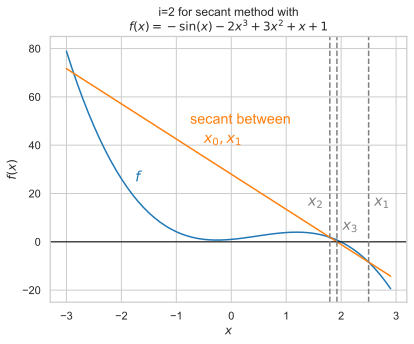

In [14]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

#y=mx+c
xz0, xz1 = xz1, xzn
xp = (func(xz1) - func(xz0))/(xz1-xz0) * (x_vals - xz1) + func(xz1)
xpf = lambda x : (func(xz1) - func(xz0))/(xz1-xz0) * (x - xz1) + func(xz1)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
linex = -.75
plt.text(linex,xpf(linex)+10,r"secant between",fontsize='large', color='tab:orange')
plt.text(linex+.25,41, r'$x_0, x_1$',fontsize='large', color='tab:orange')

plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz0, color='grey', linestyle='dashed')
plt.text(xz0+.1,15,r'$x_1$',fontsize='large',color='grey')

plt.axvline(xz1, color='grey', linestyle='dashed')
plt.text(xz1-.4,15,r'$x_2$',fontsize='large',color='grey')

xzn = xz1 - func(xz1)*((xz1-xz0)/(func(xz1)-func(xz0)))
plt.axvline(xzn,color='grey',linestyle='dashed')
plt.text(xzn+.1,5,r'$x_3$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=2'+f' for secant method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

And with $x_0=1.5,x_1=2.5$, the secant method takes seven steps to converge:

In [15]:
secant(func, (1.5, 2.5), verbose=True)

2.5
1.7939312776265919
1.9228851986592035
2.0057329296754465
1.9911810159264218
1.991992658043711
1.9920020030438528
1.9920019966374447


1.9920019966374949

### Steffensen's method

Finally, Steffensen's method is similar to Newton's method, but does not require the first derivative: instead, a finite-difference approximation for the gradient is derived:

$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$

where $h=f(x)$ is chosen to yield

$$f'(x)\approx \frac{f(x+f(x))}{f(x)}-1=g(x)$$

While this approximation is often successful, it relies on the assumption that the target function $f(x)$ has a slope that *approximately* satisfies $-1<f'(x^\ast) <0$, along with the approximated slope, $-1<g(x^\ast)<0$. Steffensen's method uses this approximation of the first derivative as a method for correction, so in cases where the assumption doesn't hold, it will often fail to approach $x^\ast$.

When substituting the approximate first derivative $g(x)$ in Newton's method, we yield the iteration step for Steffensen's method:

$$x_{i+1}=x_{i}-\frac{f(x_i)}{g(x_i)}$$

Therefore, the process for Steffensen's method is:

> 1. Begin with an initial root guess $x_0$
> 2. Obtain a new root approximation by $x_{i+1}=x_{i}-\frac{f(x_i)}{g(x_i)}$
> 3. Repeat until convergence or maximum iterations reached

Which can be represented in Python as:

In [16]:
def steffensen(a_func, x_0, tol=1e-9, max_iter=1e4, verbose=False, steps=False):
    max_iter = int(max_iter)
    counter = 0
    g_func = lambda x : a_func(x + a_func(x))/a_func(x) - 1
    x_prev = x_0
    steps_arr = []
    
    for i in range(max_iter):
        if verbose: print(x_prev)
        x_cur = x_prev - (a_func(x_prev)/g_func(x_prev))

        if steps: steps_arr += [x_cur]
        
        # check tolerance
        if abs(x_cur - x_prev) < tol or abs(x_cur) < tol:
            if steps:
                return (x_cur, steps_arr)
            return x_cur
        
        x_prev = x_cur
        counter += 1
    
    raise ValueError("No convergence")

And when applied to our example function $f(x)$, the first two iterations look like:

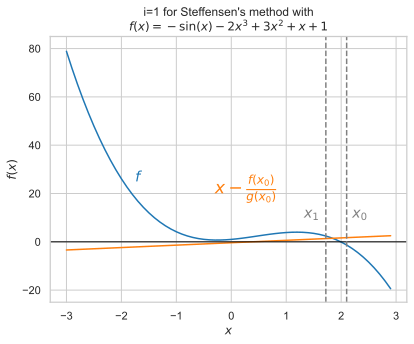

In [17]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

xz = 2.1
gf = lambda x : func(x + func(x))/func(x) - 1
xp = x_vals - func(xz)/gf(xz)
xpf = lambda x : x - func(x)/gf(x)


plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(-.3,20,r'$x-\frac{f(x_0)}{g(x_0)}$',fontsize='x-large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1, 10, r'$x_0$', color='grey', fontsize='large')

plt.axvline(xpf(xz), color='grey', linestyle='dashed')
plt.text(xpf(xz)-.4, 10, r'$x_1$', color='grey', fontsize='large')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Steffensen\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

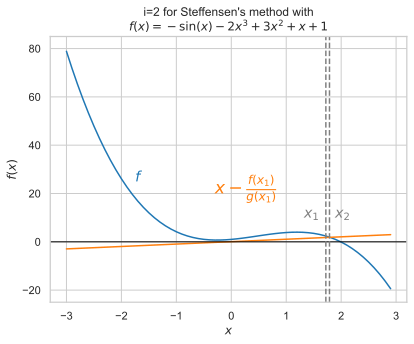

In [18]:
# <!-- collapse=True -->

x_vals = np.arange(-3,3,.1)

xz = xpf(xz)
gf = lambda x : func(x + func(x))/func(x) - 1
xp = x_vals - func(xz)/gf(xz)
xpf = lambda x : x - func(x)/gf(x)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(-.3,20,r'$x-\frac{f(x_1)}{g(x_1)}$',fontsize='x-large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz-.4, 10, r'$x_1$', color='grey', fontsize='large')

plt.axvline(xpf(xz), color='grey', linestyle='dashed')
plt.text(xpf(xz)+.1, 10, r'$x_2$', color='grey', fontsize='large')

plt.ylim(-25, 85)

plt.title(r'i=2'+f' for Steffensen\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# <end collapse>

And Steffensen's method approximates the root of our target function in 12 steps:

In [19]:
steffensen(func, 2.2, verbose=True)

2.2
0.2824472227128234
1.6268700049741058
1.6952236185434228
1.7620851785765523
1.826563816565949
1.8865752366360273
1.937913380906278
1.9738270860758726
1.9894837072915394
1.991948538536548
1.9920019721462554
1.9920019966374898


1.9920019966374947

## Comparison

Behavior of convergence varies among the methods: for example, we can compare how each method iteratively refines its estimate $\hat{x}^\ast$ of the true root $x^\ast$ for our function with each iteration:

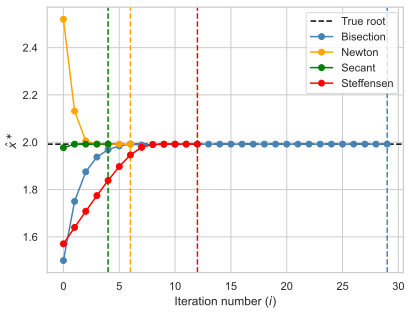

In [20]:
# <!-- collapse=True -->

def gen_steps_and_plot(f, fp, x0, x, x1):
    steps_arr = [
        bisection(f, (x0, x1), steps=True)[1],
        newton((f, fp), x, steps=True)[1],
        secant(f, (x0, x1), steps=True)[1],
        steffensen(f, x, steps=True)[1]
    ]
    
    names = ["Bisection", "Newton", "Secant", "Steffensen"]
    cols  = ["steelblue", "orange", "green", "red"]
    
    plt.axhline(fsolve(func, 1.5)[0], color='black', linestyle="dashed", label="True root")
    
    for arr, name, col in zip(steps_arr, names, cols):
        plt.plot(range(len(arr)), arr, '-o', label=name, color=col)
        plt.axvline(len(arr)-1, linestyle="dashed", color=col)
    
    plt.xlabel(r"Iteration number ($i$)")
    plt.ylabel(r"$\hat{x}^\ast$")
    plt.legend()
    
    plt.show()

gen_steps_and_plot(func, func_prime, 1, 1.5, 2)

# <end collapse>

where the vertical dashed lines represent the iteration number for convergence.

While all methods converge in under 30 steps, this behavior is sensitive to choices of $x_0, x_1$ — for example, widening the initial guess range produces the following:

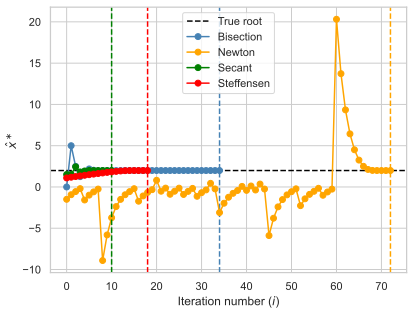

In [21]:
gen_steps_and_plot(func, func_prime, -10, 1, 10)

To get a wider feel for method behavior, we can look at three additional functions:

$$
\begin{align*}
&f_1=\sin(x)-e^{-x}+5x^{3}-x^2;\space\space f_1^\prime=x(15x-2)+e^{-x}+\cos(x) \\
&f_2=x^3 + \frac{1}{1+2x^2} - x;\space\space f_2^\prime = 3x^2 - \frac{4x}{(1+2x^2)^2} - 1 \\
&f_3 = 5x^4 - 4x^2 + 2x - 3; \space\space f_3^\prime = 20x^3 - 8x + 2
\end{align*}
$$

which are, in Python:

In [22]:
f1 = lambda x : np.sin(x) - np.e**(-x) + 5*(x**3) - x**2
f1d = lambda x : x*(15*x - 2) + np.e**(-x) + np.cos(x)

f2 = lambda x : x**3 + 1/(1+2*(x**2)) - x
f2d = lambda x : 3*(x**2) - (4*x)/((1+2*(x**2))**2) - 1

f3 = lambda x : 5*(x**4) - 4*(x**2) + 2*x - 3
f3d = lambda x : 20*(x**3) - 8*x + 2

And we can plot the functions like so, defining $x_0$ and $x_1$ for each:

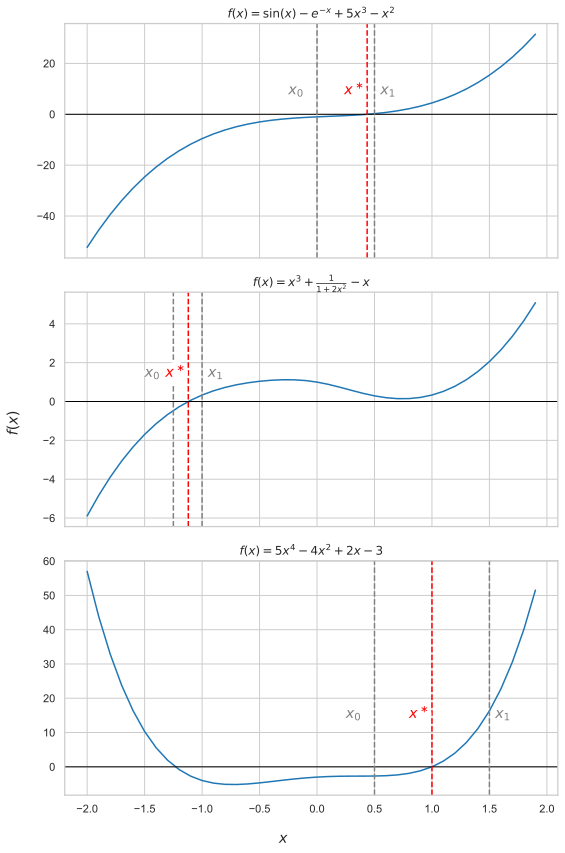

In [23]:
# <!-- collapse=True -->

f_total = ((f1, f1d, "f_1", (0,.5)), 
           (f2, f2d, "f_2", (-1.25, -1)),
           (f3, f3d, "f_3", (.5, 1.5)))

f_latex = [(r"\sin(x)-e^{-x}+5x^{3}-x^2", "f_1^\prime=x(15x-2)+e^{-x}+\cos(x)"),
          (r"x^3 + \frac{1}{1+2x^2} - x", "f_2^\prime = 3x^2 - \frac{4x}{(1+2x^2)^2} - 1"),
          (r"5x^4 - 4x^2 + 2x - 3", "f_3^\prime = 20x^3 - 8x + 2")]

x_vals = np.arange(-2,2,.1)
fig, axs = plt.subplots(len(f_total), 1, sharex=True)
fig.set_size_inches(8, 12)

for f_no, f in enumerate(f_total):
    ax = axs[f_no]
    yvals = f[0](x_vals)
    
    ax.plot(x_vals, yvals)
    ax.set_title(rf'$f(x)={f_latex[f_no][0]}$')
    ax.axhline(0, color="black", linewidth=1)
    
    ax.axvline(f[3][0], color='grey', linestyle='dashed')
    ax.text(f[3][0]-.25, .25*np.max(yvals), r'$x_0$', color='grey', fontsize='large',
           bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))

    ax.axvline(f[3][1], color='grey', linestyle='dashed')
    ax.text(f[3][1]+.05, .25*np.max(yvals), r'$x_1$', color='grey', fontsize='large',
            bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))
    
    true_root = fsolve(f[0], f[3][0])[0]
    ax.axvline(true_root, color='red', linestyle='dashed')
    ax.text(true_root-.2, .25*np.max(yvals), r'$x^\ast$', color='red', fontsize='large',
           bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))
    
    
fig.supylabel(r'$f(x)$')
fig.supxlabel(r'$x$')
fig.tight_layout()
plt.show()

# <end collapse>

For fun, we can create a table to show how each method handles each function in terms of time (in seconds, and number of iterations):

In [24]:
# <!-- collapse=True -->

methods = [bisection, newton, secant, steffensen]
method_labels = [f'{m} Method' for m in ["Bisection", "Newton's", "Secant", "Steffensen's"]]
method_res = [[[] for _ in range(len(methods))] for _ in f_total] # store result as (x, steps, time)

for f_no, f in enumerate(f_total):
    f, fp, f_lab, guess = f
    
    print(f"FUNCTION {f_no+1}")
    print("".join([i.ljust(25) for i in ['Method', 'Time', 'Iterations', 'Result']]))
    print("-"*95)
    for m, method in enumerate(methods):
        cur_time = timeit.Timer()

        try:
            if m in (0, 2): # bisection/secant need x0,x1
                x, steps = method(f, guess, steps=True)
            elif m == 1: # newton needs f'
                x, steps = method((f, fp), guess[0], steps=True)
            else:
                x, steps = method(f, guess[0], steps=True)
            end_time = cur_time.timeit()
        except Exception:
            x, steps, end_time = guess[0], float('inf'), None
        
        end_time = np.round(end_time, 4) if end_time is not None else end_time
        x = np.round(x, 4) if x is not None else x
        print("".join(i.ljust(25) for i in list(map(str,[method_labels[m], end_time, len(steps)+1, x]))))
    print()
    
# <end collapse>

FUNCTION 1
Method                   Time                     Iterations               Result                   
-----------------------------------------------------------------------------------------------
Bisection Method         0.0078                   29                       0.436                    
Newton's Method          0.0064                   7                        0.436                    
Secant Method            0.0061                   7                        0.436                    
Steffensen's Method      0.0058                   10                       0.436                    

FUNCTION 2
Method                   Time                     Iterations               Result                   
-----------------------------------------------------------------------------------------------
Bisection Method         0.0059                   27                       -1.12                    
Newton's Method          0.0053                   6                        -1.

And averaging times over multiple runs:

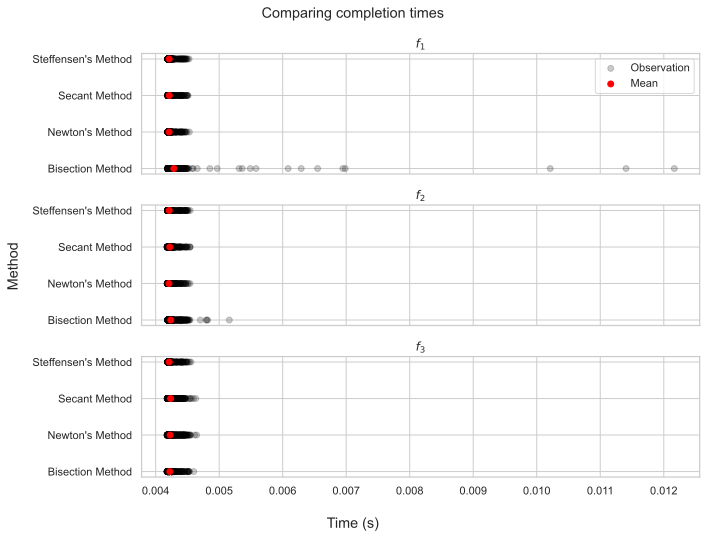

In [25]:
# <!-- collapse=True -->

methods = [bisection, newton, secant, steffensen]
method_labels = [f'{m} Method' for m in ["Bisection", "Newton's", "Secant", "Steffensen's"]]
iterations = 1000
method_res = [[[] for _ in range(len(methods))] for _ in f_total] # store result as [func][method][(x, steps, time)]

for f_no, f_arr in enumerate(f_total):
    f, fp, f_lab, guess = f_arr

    for m, method in enumerate(methods):
        for _ in range(iterations):
            try:
                cur_time = timeit.Timer()
                if m in (0, 2):
                    x, steps = method(f, guess, steps=True)
                elif m == 1:
                    x, steps = method((f, fp), guess[0], steps=True)
                else:
                    x, steps = method(f, guess[0], steps=True)
                end_time = cur_time.timeit()
                
            except ValueError:
                x, steps, end_time = None, None, None
            
            method_res[f_no][m].append((x, len(steps)+1, end_time))

fig, axs = plt.subplots(len(f_total), 1, sharex=True)
w,h = 10,7.5
fig.set_size_inches(w,h)
iterations = 1000

for f_no in range(len(f_total)):
    curax=axs[f_no]
    
    curax.scatter([[j[2] for j in method_res[f_no][i]] for i in range(4)],
                [[i]*iterations for i in range(4)],
               color='black',
               alpha=.2,
               label="Observation")
    curax.scatter([np.mean(np.array([j[2] for j in method_res[f_no][i]],dtype=float)) for i in range(4)], range(4), color='red', label="Mean")
    curax.set_yticks(range(4), [method_labels[i] for i in range(4)])
    curax.set_title(r'${}$'.format(f_total[f_no][2]))

fig.supxlabel("Time (s)")
fig.supylabel("Method")
fig.suptitle(f"Comparing completion times")
# axs[0].legend(bbox_to_anchor=(1.3,1.05))
axs[0].legend()
fig.tight_layout()

# <end collapse>

With distributions for number of iterations to convergence:

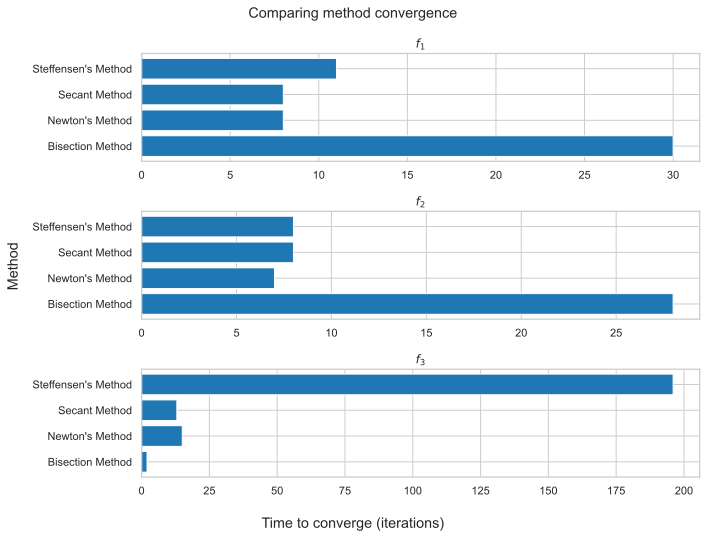

In [26]:
# <!-- collapse=True -->

fig, axs = plt.subplots(len(f_total), 1)
w,h = 10,7.5
fig.set_size_inches(w,h)

for f_no in range(len(f_total)):
    curax = axs[f_no]
    
    curax.barh([method_labels[i] for i in range(4)],
         [np.nanmean(np.array([j[1]+1 for j in method_res[f_no][i]],dtype=float)) for i in range(4)])
    curax.set_title(r'${}$'.format(f_total[f_no][2]))

fig.supxlabel("Time to converge (iterations)")
fig.supylabel("Method")

fig.suptitle(f"Comparing method convergence")
fig.tight_layout()

# <end collapse>

An immediately interesting observation is that Steffensen's method is the only method to converge to the negative root of $f_3$ — this is explained by the derivative for $f_3$ being much larger than zero:

In [27]:
f3d(fsolve(f3,1)[0])

14.0

meaning the correction method used by Steffensen's method doesn't lead it to the root at $1.0$.

Another quirk is that the recorded times for $f_1$ seem to dominate those of $f_2$ and $f_3$ — this is because $f_1$ is more expensive to compute, so even though the bisection method takes the same number of iterations to converge for $f_1$ and $f_2$, the runtimes for $f_1$ are much higher than those for $f_2$.

This also impacts the performance of Newton's method compared to the secant method for $f_2$ — the average time for the secant method to converge is smaller than that of Newton's method, possibly because computing the first derivative for $f_2$ is expensive (which is not used by the secant method):

In [28]:
# mean of secant method - mean of Newton's method
np.mean([j[2] for j in method_res[1][2]]) - np.mean([j[2] for j in method_res[1][1]])

7.458498889900429e-05

## Conclusion

Of course, different root-finding algorithms have trade-offs outside of convergence and complexity — if you're interested, further reading can be found [here](https://en.wikipedia.org/wiki/Rate_of_convergence#Convergence_speed_for_iterative_methods). Some methods presented here may be inappropriate for certain situations where the function is not differentiable (Newton's method), or where the first derivative cannot be sufficiently approximated (Steffensen's).

Most modern software that automates the root-finding approximation process does so with more complicated methods than those examined in this post — for example, [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)'s `fsolve` uses what appears to be a [modified](https://www.math.utah.edu/software/minpack/minpack/hybrj.html) version of [Powell's method](https://en.wikipedia.org/wiki/Powell%27s_dog_leg_method), which does not require the target function to be differentiable.

That being said, the above root-finding algorithms are useful for a foundational knowledge of underlying systems for optimization, simulation, and solving systems of equations. Perhaps more importantly, though, they are just plain interesting, and hopefully the visualizations in this post inspired some intuition for how these root-finding algorithms work.